# DA Mini Project
주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석  

목적 : 이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.¶


 온라인 학습플랫폼이 토익, 자격증과 같은 단기 학습 위주의 플랫폼이라고 가정

가설 : 중단된 학습 세션 수가  적을 수록 학습성취도가 높고 단기간에 성적을 낼 수 있어서 연장을 하지 않을 것으로 예상 

## 요구사항 분석

누가 구독을 연장할지 예측하기 위한 사적 파악을 위해서 현재 구독을 연장한 사람들의 데이터를 토대로 어떠한 공통점이 있는지 파악.  
target데이터를 적극적으로 이용하여 사람들의 공통적인 행동패턴 찾기

미션1) 
1. 최근 학업 성취도와 중단된 학습 세션 수의 상관관계 비교
2. target과 payment_pattern 를 이용하여 다음달에 연장을 한 사람들(target = 1)중에서 결제 패턴과 학업성취도, 중단된 학습 세션 수에 특이점이 있는지 확인

In [5]:
import pandas as pd

In [6]:
access_data = pd.read_table('C:/workspace/WASSUP4/05_Data_Analysis/data/mini.csv', sep=',')

In [7]:
access_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [8]:
access_data.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0


In [9]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [10]:
access_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [11]:
# target이 1일 때 특징 찾아보기
target_1_data = access_data[access_data['target'] == 1]
target_1_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9ee4e40c,11,6,11.187836,88.757610,6,9,77.335911,5,4,High,Basic,1,4,1
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1


In [12]:
# target이 0일 때 특징 찾아보기
target_0_data = access_data[access_data['target'] == 0]
target_0_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
10,594da7eb,19,21,13.953449,135.256834,13,11,76.414481,0,4,High,Basic,2,1,0
11,b8696d56,5,28,18.474545,117.134599,9,9,97.786237,6,3,Medium,Premium,2,3,0
14,aba89783,2,27,10.303337,2.712124,20,8,82.491912,4,5,Low,Basic,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,0d22254f,12,18,11.709882,40.075854,4,13,77.026299,2,2,High,Basic,2,3,0
9983,f2757504,22,23,16.739713,6.047050,15,9,64.817228,4,5,Medium,Basic,2,3,0
9987,ec7013a5,21,7,17.466408,160.590536,14,14,76.861836,4,5,Medium,Premium,2,2,0
9989,039902b7,5,23,10.607962,21.655545,9,9,57.110845,1,2,Low,Basic,1,3,0


In [130]:
payment_pattern_data = target_1_data.groupby('payment_pattern')[['abandoned_learning_sessions','recent_learning_achievement']].mean()
payment_pattern_data

,abandoned_learning_sessions,recent_learning_achievement
payment_pattern,,
0,2.873606,74.753908
1,3.051086,75.058431
2,3.113788,75.932448
3,3.062910,74.506577
4,2.945551,75.034074
5,3.040000,74.988987
6,3.039950,75.006099
7,3.013836,75.131386


In [132]:
recent_learning_achievement_data = target_1_data.groupby('recent_learning_achievement')[['abandoned_learning_sessions','payment_pattern']].mean()
recent_learning_achievement_data

,abandoned_learning_sessions,payment_pattern
recent_learning_achievement,,
36.115562,4.0,5.0
36.830979,0.0,6.0
42.430858,2.0,2.0
42.870248,4.0,4.0
42.970217,2.0,2.0
...,...,...
106.102230,3.0,3.0
108.127099,3.0,2.0
109.686851,4.0,2.0


In [14]:
# target이 1인 학생들 중에서 최근 학습 성취도와 중단된 세선 수를 가지고 payment_pattern 분석
selected_1_data = target_1_data[['recent_learning_achievement', 'abandoned_learning_sessions','payment_pattern']]
selected_1_data = selected_1_data.sort_values(by='recent_learning_achievement')
selected_1_data

,recent_learning_achievement,abandoned_learning_sessions,payment_pattern
1249,36.115562,4,5
8299,36.830979,0,6
355,42.430858,2,2
55,42.870248,4,4
8726,42.970217,2,2
...,...,...,...
1591,106.102230,3,3
7148,108.127099,3,2
8394,109.686851,4,2
2561,111.219647,2,2


In [15]:
# target이 0인 학생들 중에서 최근 학습 성취도와 중단된 세선 수를 가지고 payment_pattern 분석
selected_0_data = target_0_data[['recent_learning_achievement', 'abandoned_learning_sessions','payment_pattern']]
selected_0_data = selected_0_data.sort_values(by='recent_learning_achievement')
selected_0_data

,recent_learning_achievement,abandoned_learning_sessions,payment_pattern
3964,35.941755,2,2
3567,41.752942,2,4
4781,42.254863,3,2
3755,43.068185,3,7
1017,43.733914,7,3
...,...,...,...
7981,104.812784,6,3
4289,105.074082,4,7
2274,106.385512,1,0
7861,106.942927,2,3


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

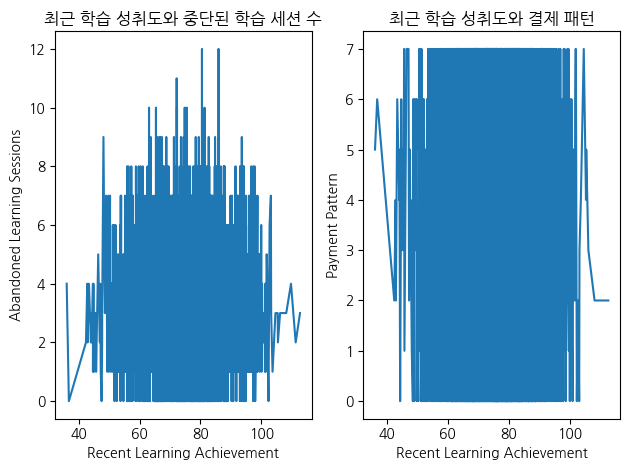

In [103]:
# abandoned_learning_sessions 시각화
plt.subplot(1, 2, 1)
sns.lineplot(data=selected_1_data, x='recent_learning_achievement', y='abandoned_learning_sessions')
plt.title('최근 학습 성취도와 중단된 학습 세션 수')
plt.xlabel('Recent Learning Achievement')
plt.ylabel('Abandoned Learning Sessions')

# payment_pattern 시각화
plt.subplot(1, 2, 2)
sns.lineplot(data=selected_1_data, x='recent_learning_achievement', y='payment_pattern')
plt.title('최근 학습 성취도와 결제 패턴')
plt.xlabel('Recent Learning Achievement')
plt.ylabel('Payment Pattern')

plt.tight_layout()
plt.show()

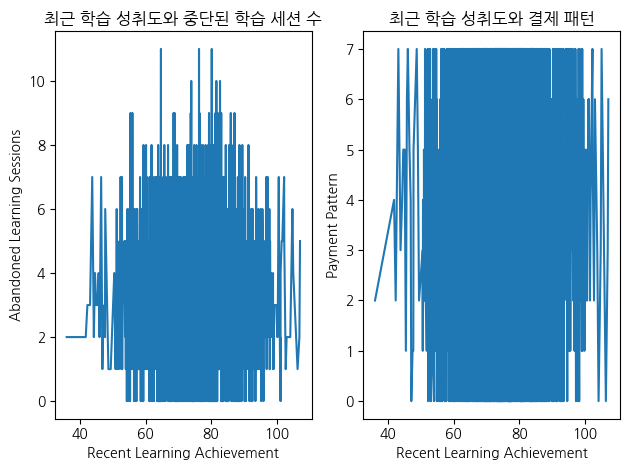

In [105]:
# abandoned_learning_sessions 시각화
plt.subplot(1, 2, 1)
sns.lineplot(data=selected_0_data, x='recent_learning_achievement', y='abandoned_learning_sessions')
plt.title('최근 학습 성취도와 중단된 학습 세션 수')
plt.xlabel('Recent Learning Achievement')
plt.ylabel('Abandoned Learning Sessions')

# payment_pattern 시각화
plt.subplot(1, 2, 2)
sns.lineplot(data=selected_0_data, x='recent_learning_achievement', y='payment_pattern')
plt.title('최근 학습 성취도와 결제 패턴')
plt.xlabel('Recent Learning Achievement')
plt.ylabel('Payment Pattern')

plt.tight_layout()
plt.show()

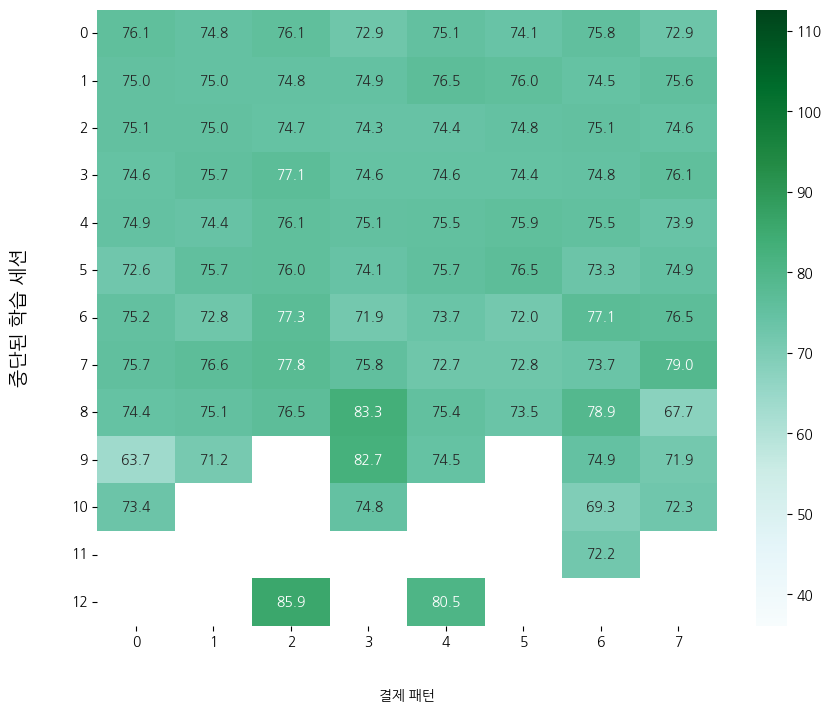

In [107]:
# target 1일 때 피벗 테이블 생성
pivot_1_table = selected_1_data.pivot_table(values='recent_learning_achievement', 
                                        index='abandoned_learning_sessions', 
                                        columns='payment_pattern')

# 히트맵 생성
plt.figure(figsize=(10, 8))

sns.heatmap(data=pivot_1_table,
            annot=True,  # 각 cell의 데이터 표기 유무
            fmt='.1f',   # 데이터 값의 소수점 표기
            vmin=selected_1_data['recent_learning_achievement'].min(),  # 색 범위 최소값
            vmax=selected_1_data['recent_learning_achievement'].max(),  # 색 범위 최댓값
            cmap="BuGn"  # 히트맵 색상 설정
           )

plt.xlabel('결제 패턴', fontsize=10, labelpad=30)
plt.ylabel('중단된 학습 세션', fontsize=14, labelpad=30)
plt.yticks(rotation=0)

plt.show()

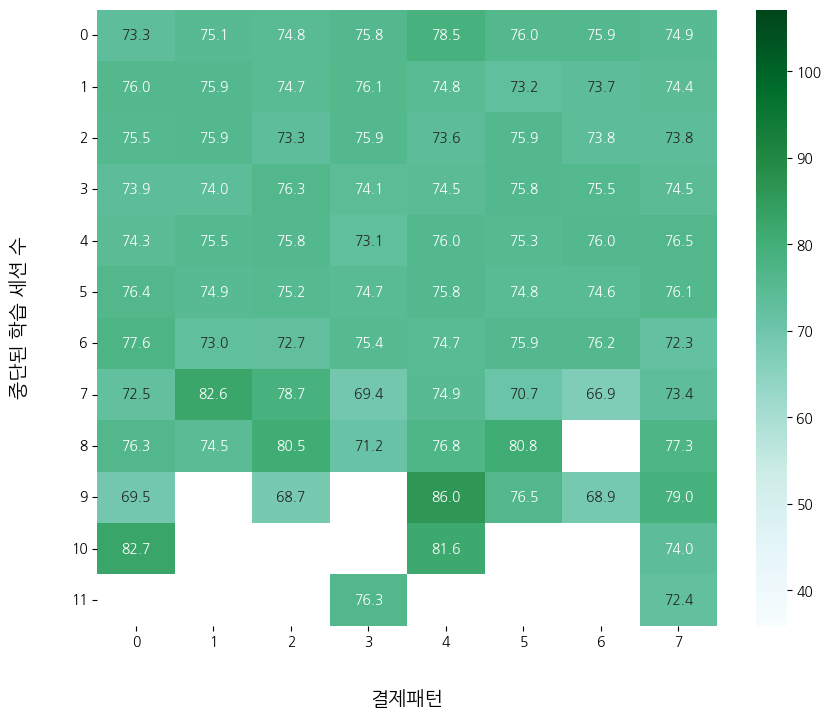

In [113]:
# tartget 0일 때 피벗 테이블 생성
pivot_0_table = selected_0_data.pivot_table(values='recent_learning_achievement', 
                                        index='abandoned_learning_sessions', 
                                        columns='payment_pattern')

# 히트맵 생성
plt.figure(figsize=(10, 8))

sns.heatmap(data=pivot_0_table,
            annot=True,  # 각 cell의 데이터 표기 유무
            fmt='.1f',   # 데이터 값의 소수점 표기
            vmin=selected_0_data['recent_learning_achievement'].min(),  # 색 범위 최소값
            vmax=selected_0_data['recent_learning_achievement'].max(),  # 색 범위 최댓값
            cmap="BuGn"  # 히트맵 색상 설정
           )

plt.xlabel('결제패턴', fontsize=14, labelpad=30)
plt.ylabel('중단된 학습 세션 수', fontsize=14, labelpad=30)
plt.yticks(rotation=0)

plt.show()

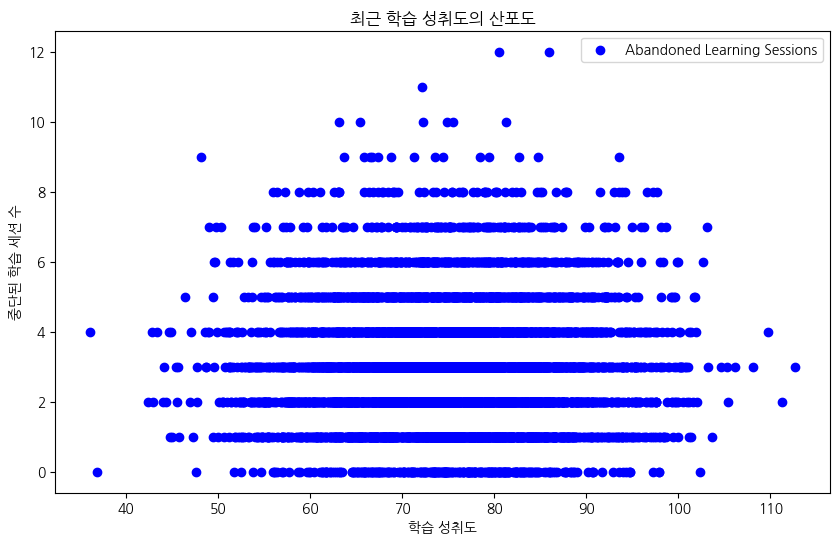

In [153]:
# 학습 성취도와 중단된 학습 세션 수의 산포도 그래프 생성
plt.figure(figsize=(10, 6))
plt.scatter(selected_1_data['recent_learning_achievement'], selected_1_data['abandoned_learning_sessions'], c='blue', label='Abandoned Learning Sessions')
# plt.scatter(selected_1_data['recent_learning_achievement'], selected_1_data['payment_pattern'], c='green', label='Payment Pattern')

# 그래프 제목과 축 레이블 설정
plt.title('최근 학습 성취도의 산포도')
plt.xlabel('학습 성취도')
plt.ylabel('중단된 학습 세션 수')
plt.legend()

# 그래프 표시
plt.show()

In [232]:
aband_pay_data = target_1_data.groupby(['abandoned_learning_sessions', 'payment_pattern']).size().reset_index(name='count')
aband_pay_data

,abandoned_learning_sessions,payment_pattern,count
0,0,0,43
1,0,1,28
2,0,2,34
3,0,3,33
4,0,4,39
...,...,...,...
80,10,6,2
81,10,7,1
82,11,6,1
83,12,2,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


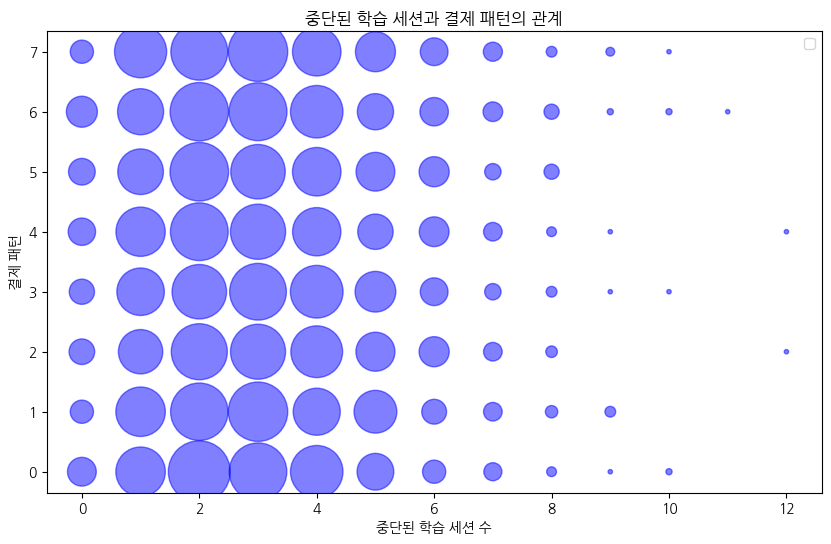

In [238]:
# 중단된 힉습 세션 수와 결제 패턴의 산포도 그래프 생성
plt.figure(figsize=(10, 6))
# plt.scatter(selected_1_data['recent_learning_achievement'], selected_1_data['abandoned_learning_sessions'], c='blue', label='Abandoned Learning Sessions')
plt.scatter(aband_pay_data['abandoned_learning_sessions'], aband_pay_data['payment_pattern'], s=aband_pay_data['count']*10, c='blue', alpha=0.5)

# 그래프 제목과 축 레이블 설정
plt.title('중단된 학습 세션과 결제 패턴의 관계')
plt.xlabel('중단된 학습 세션 수')
plt.ylabel('결제 패턴')
plt.legend()

# 그래프 표시
plt.show()

### 결론

학습 성취도가 높으면 중단된 학습 세션 수가 낮은 경우가 있지만 학습 성취도가 낮은 경우에도 중단된 학습 세션 수가 낮아서 결국 둘의 상관 관계는 없는 것으로 보인다.
결제 패턴과의 관계도 있지 않을까 싶었는데 위의 산포도 그래프를 보면 그것도 관계가 없는 것으로 보인다.

## 데이터 분석 2차

가설 2